In [2]:
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
fnames = ["CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_01_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_03_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_05_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_07_mom_2023-01-13.json",
          "CloudModel_training_results_15epochs_24batchsize_0.001lr_BCELoss()_crit_SGD_optim_09_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_Adam_optim_2023-01-13.json"
         ]
p01 = pd.read_json(fnames[0],orient='column')
p03 = pd.read_json(fnames[1],orient='column')
#p05 = pd.read_json(fnames[2],orient='column')
#p07 = pd.read_json(fnames[3],orient='column')
p09 = pd.read_json(fnames[4],orient='column')
#pad = pd.read_json(fnames[5],orient='column')

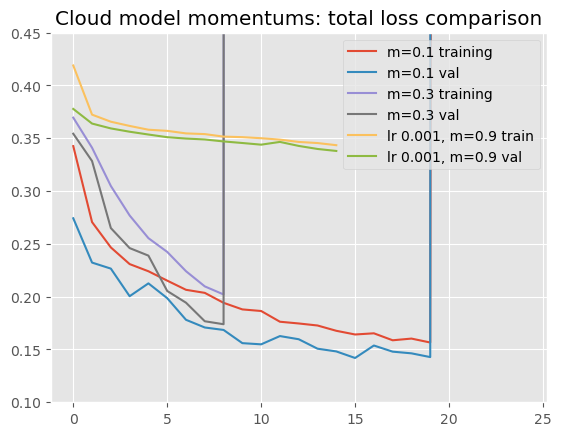

In [7]:
plt.figure()
plt.plot(p01['training']['total_loss'], label= 'm=0.1 training')
plt.plot(p01['validating']['total_loss'], label= 'm=0.1 val')
plt.plot(p03['training']['total_loss'], label = 'm=0.3 training')
plt.plot(p03['validating']['total_loss'], label= 'm=0.3 val')
#plt.plot(p05['training']['total_loss'], label = 'm=0.5')
#plt.plot(p07['training']['total_loss'], label = 'm=0.7')
plt.plot(p09['training']['total_loss'], label = 'lr 0.001, m=0.9 train')
plt.plot(p09['validating']['total_loss'], label = 'lr 0.001, m=0.9 val')
#plt.plot(pad['training']['total_loss'], label = 'adam')
plt.title('Cloud model momentums: total loss comparison')
plt.ylim([0.1,0.45])
plt.legend()
plt.show()

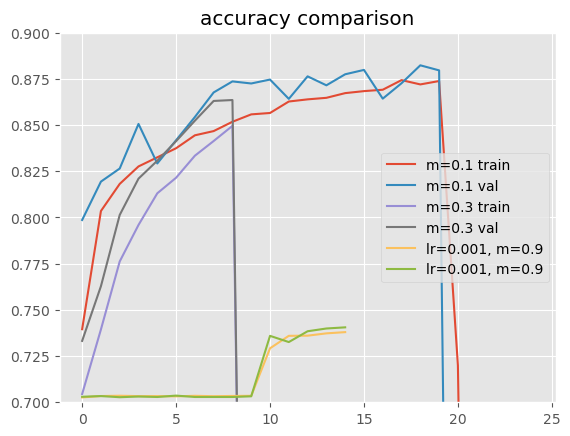

In [9]:
plt.figure()
plt.plot(p01['training']['accuracy'], label= 'm=0.1 train')
plt.plot(p01['validating']['accuracy'], label= 'm=0.1 val')
plt.plot(p03['training']['accuracy'], label = 'm=0.3 train')
plt.plot(p03['validating']['accuracy'], label= 'm=0.3 val')
#plt.plot(p05['training']['accuracy'], label = 'm=0.5')
#plt.plot(p07['training']['accuracy'], label = 'm=0.7')
plt.plot(p09['training']['accuracy'], label = 'lr=0.001, m=0.9')
plt.plot(p09['validating']['accuracy'], label = 'lr=0.001, m=0.9')
#plt.plot(pad['training']['accuracy'], label = 'adam')
plt.ylim([0.7,0.9])
plt.title('accuracy comparison')
plt.legend()
plt.show()